<a href="https://colab.research.google.com/github/samjurassic/datascience-demo/blob/main/education/ml_tree_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [2]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

students.describe()

,index,age,gpa,days_missed,full_time,freshman,first_generation,employed,pell_grant
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,8514.909412,23.199579,2.987455,7.156176,0.631706,0.623529,0.628647,0.532882,0.538000
std,4903.566301,4.124669,0.521384,5.978905,0.482356,0.484514,0.483181,0.498932,0.498569
min,0.000000,5.905179,1.146199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4310.500000,20.392630,2.634031,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8487.500000,23.265091,2.986107,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,12770.250000,25.975284,3.339473,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16999.000000,38.883769,5.038269,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15) # 70% training and 30% test

In [4]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.751
Precision: 0.69
Recall: 0.622
[[4385  900]
 [1216 1999]]


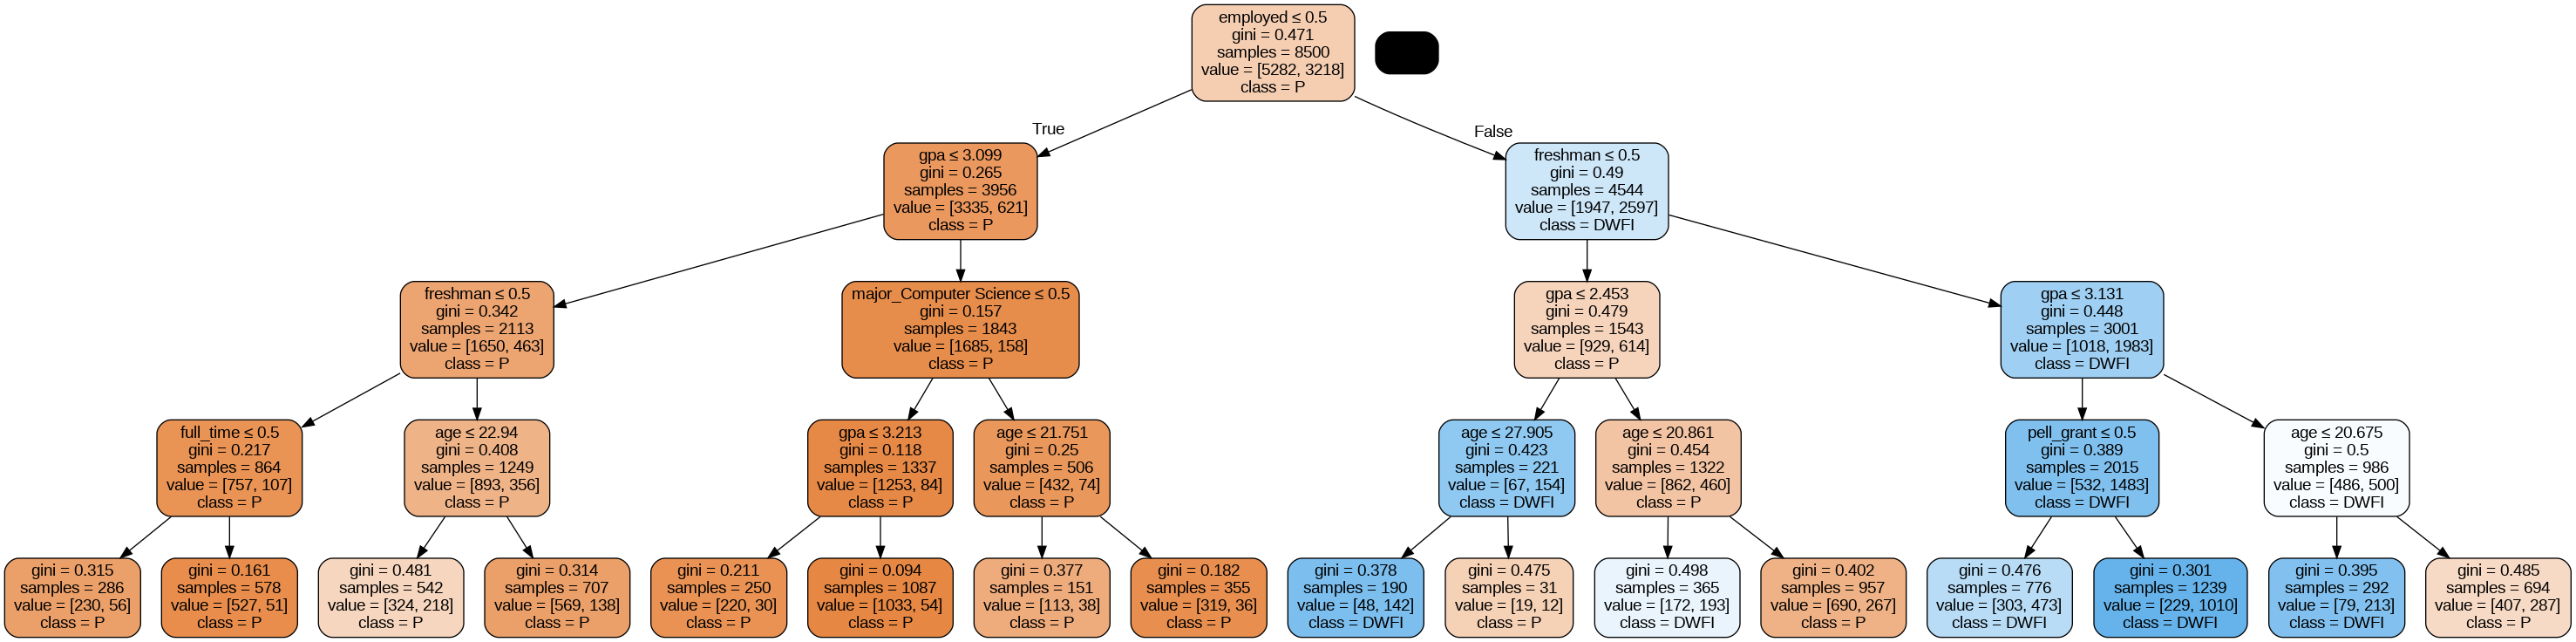

In [5]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [6]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.764
Precision: 0.776
Recall: 0.529
[[4794  491]
 [1514 1701]]


In [7]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.05, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

      Iter       Train Loss   Remaining Time 
         1           1.3011            6.84s
         2           1.2781            7.42s
         3           1.2571            5.69s
         4           1.2379            4.83s
         5           1.2199            4.47s
         6           1.2037            4.34s
         7           1.1884            3.98s
         8           1.1746            4.07s
         9           1.1615            3.75s
        10           1.1497            3.57s
        20           1.0648            2.86s
        30           1.0153            2.19s
        40           0.9817            1.85s
        50           0.9567            1.58s
        60           0.9383            1.31s
        70           0.9237            1.04s
        80           0.9124            0.70s
        90           0.9033            0.36s
       100           0.8960            0.00s
Accuracy: 0.781
Precision: 0.739
Recall: 0.651
[[4544  741]
 [1121 2094]]


In [8]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.804
Random forest: 0.8407
Gradient boosting: 0.8536


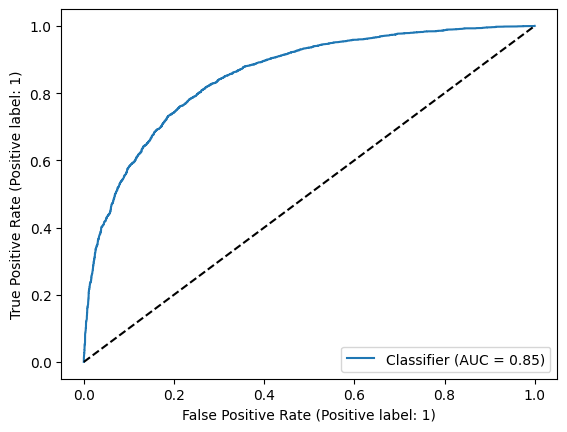

In [9]:
# Plot the ROC curve
display = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=clf_gb.predict_proba(X_test)[:,1]
)

# plot the dashed line to show a random model (BAD, as if coin flip)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

In [10]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6],
    "learning_rate": [0.01, 0.5],
    "subsample":[0.10],
    "n_estimators":[50, 100, 150, 200]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.5], 'max_depth': [6],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.1]},
             scoring='roc_auc')

In [11]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.1}


,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,rank_test_score,mean_test_score,std_test_score
3,0.01,6,200,0.1,1,0.849866,0.003384
2,0.01,6,150,0.1,2,0.848945,0.003902
1,0.01,6,100,0.1,3,0.847727,0.003779
0,0.01,6,50,0.1,4,0.844031,0.004207
4,0.5,6,50,0.1,5,0.630724,0.022451
5,0.5,6,100,0.1,6,0.599678,0.012934
6,0.5,6,150,0.1,6,0.599678,0.012934
7,0.5,6,200,0.1,6,0.599678,0.012934


In [12]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(**search.best_params_)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")

Accuracy: 0.779
Precision: 0.741
Recall: 0.64
[[4564  721]
 [1156 2059]]
Gradient boosting: 0.8536


In [13]:
param_grid_rf = {
    "max_depth":[2, 5, 8, 10],
    "n_estimators":[100, 25, 200, 400],
    "min_impurity_decrease": [0.01, 0.03],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_impurity_decrease': [0.01, 0.03],
                         'n_estimators': [100, 25, 200, 400]},
             scoring='roc_auc')

In [14]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'n_estimators': 100}


,param_min_impurity_decrease,param_max_depth,param_n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.01,2,100,1,0.829808,0.006815
3,0.01,2,400,2,0.828999,0.007842
2,0.01,2,200,3,0.828771,0.007587
24,0.01,10,100,4,0.828488,0.006488
8,0.01,5,100,4,0.828488,0.006488
16,0.01,8,100,4,0.828488,0.006488
26,0.01,10,200,7,0.828034,0.008088
10,0.01,5,200,7,0.828034,0.008088
18,0.01,8,200,7,0.828034,0.008088
11,0.01,5,400,10,0.827994,0.007891


<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

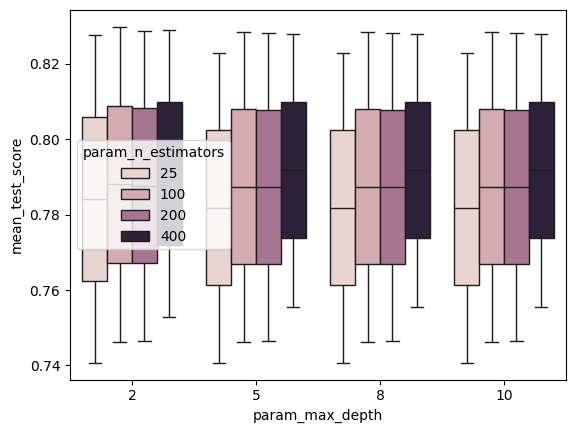

In [15]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")

In [16]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(**search_rf.best_params_)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.714
Precision: 0.841
Recall: 0.3
[[5103  182]
 [2249  966]]


In [57]:
def get_comp_test_data():

  comp_test_fn = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"

  comp_test = pd.read_csv(comp_test_fn, index_col="index")

  # create dummy variables (0, 1) for borough and major
  comp_full = pd.get_dummies(comp_test, columns=["borough", "major"], drop_first=True)
  # students_full.columns

  #split dataset in features and target variable
  feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
        'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
        'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
        'major_Computer Science']

  return comp_full

comp_X = get_comp_test_data()

def make_predictions_df(model, X, features):
  probs = model.predict_proba(X[features])[:,1]
  return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

output_df = make_predictions_df(clf_rf, comp_X, feature_cols)

# check output
assert len(output_df) == 17000
assert output_df.index[-1] == 16998
assert output_df.columns[0] == "outcome"

output_df.to_csv("sam_predictions_rf2.csv", index=True)